In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:

# Import test and train datasets
covid_train ='C:/Users/afm6343/COVID-19-geographic-disbtribution-worldwide-train.csv'
df_train = pd.read_csv(covid_train)


In [4]:
df_train.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,9/20/2020,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657
1,9/19/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2,9/18/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
3,9/17/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
4,9/16/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649


In [5]:
df_train.dtypes

dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object

In [6]:
df_train.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
43922,3/25/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43923,3/24/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43924,3/23/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43925,3/22/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
43926,3/21/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [7]:
df_train = df_train.drop(['countryterritoryCode', 'day','month', 'year'], axis=1)
df_train.head()

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,9/20/2020,125,4,Afghanistan,AF,38041757.0,Asia,1.892657
1,9/19/2020,47,1,Afghanistan,AF,38041757.0,Asia,1.616645
2,9/18/2020,0,0,Afghanistan,AF,38041757.0,Asia,1.535155
3,9/17/2020,17,0,Afghanistan,AF,38041757.0,Asia,1.653446
4,9/16/2020,40,10,Afghanistan,AF,38041757.0,Asia,1.708649


In [8]:
df_train = df_train.rename(columns={"dateRep": "date", "countriesAndTerritories": "country/territory", "geoId": "geoID", "continentExp": "continent", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000": "cases in last 14 days per 100000" })
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000
0,9/20/2020,125,4,Afghanistan,AF,38041757.0,Asia,1.892657
1,9/19/2020,47,1,Afghanistan,AF,38041757.0,Asia,1.616645
2,9/18/2020,0,0,Afghanistan,AF,38041757.0,Asia,1.535155
3,9/17/2020,17,0,Afghanistan,AF,38041757.0,Asia,1.653446
4,9/16/2020,40,10,Afghanistan,AF,38041757.0,Asia,1.708649


In [9]:
df_train.shape

(43927, 8)

In [10]:
duplicate_rows_df_train = df_train[df_train.duplicated()]
print(duplicate_rows_df_train.shape)

(0, 8)


In [11]:
print(df_train.isnull().sum())

date                                   0
cases                                  0
deaths                                 0
country/territory                      0
geoID                                190
popData2019                           64
continent                              0
cases in last 14 days per 100000    2781
dtype: int64


In [12]:
df_train = df_train.dropna()
df_train.count()

date                                40969
cases                               40969
deaths                              40969
country/territory                   40969
geoID                               40969
popData2019                         40969
continent                           40969
cases in last 14 days per 100000    40969
dtype: int64

In [13]:
df_train.tail()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000
43909,4/7/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,0.047796
43910,4/6/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,0.047796
43911,4/5/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,0.047796
43912,4/4/2020,1,0,Zimbabwe,ZW,14645473.0,Africa,0.054624
43913,4/3/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,0.054624


In [14]:
df_train.describe()

,cases,deaths,popData2019,cases in last 14 days per 100000
count,40969.000000,40969.000000,4.096900e+04,40969.000000
mean,752.130294,23.370451,4.342304e+07,33.174818
std,4523.359310,130.765631,1.591286e+08,76.466764
min,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,0.000000,0.000000,1.355982e+06,0.378737
50%,13.000000,0.000000,8.519373e+06,4.601845
75%,179.000000,3.000000,2.916192e+07,26.658601
max,97894.000000,4928.000000,1.433784e+09,1058.225943


In [15]:
print(df_train.cases.size)

40969


In [16]:
print(df_train.date.size)

40969


In [17]:
scaler = MinMaxScaler()

In [18]:
df_scaled = scaler.fit_transform(df_train[['deaths']])


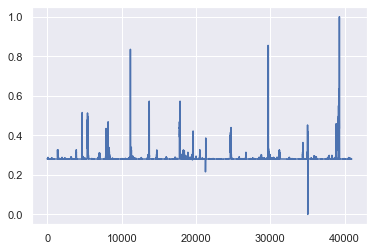

In [19]:
plt.plot(df_scaled)


In [20]:
df_train['continent'].nunique()


5

In [21]:
df_train.continent.drop_duplicates()

0          Asia
255      Europe
451      Africa
1085    America
2084    Oceania
Name: continent, dtype: object

In [22]:
df_train['country/territory'].nunique()


208

In [23]:
print(df_train['date'])
df_train['date'] = pd.to_datetime(df_train['date'], format="%m/%d/%Y")
print(df_train['date'])

0        9/20/2020
1        9/19/2020
2        9/18/2020
3        9/17/2020
4        9/16/2020
5        9/15/2020
6        9/14/2020
7        9/13/2020
8        9/12/2020
9        9/11/2020
10       9/10/2020
11        9/9/2020
12        9/8/2020
13        9/7/2020
14        9/6/2020
15        9/5/2020
16        9/4/2020
17        9/3/2020
18        9/2/2020
19        9/1/2020
20       8/31/2020
21       8/30/2020
22       8/29/2020
23       8/28/2020
24       8/27/2020
25       8/26/2020
26       8/25/2020
27       8/24/2020
28       8/23/2020
29       8/22/2020
           ...    
43884     5/2/2020
43885     5/1/2020
43886    4/30/2020
43887    4/29/2020
43888    4/28/2020
43889    4/27/2020
43890    4/26/2020
43891    4/25/2020
43892    4/24/2020
43893    4/23/2020
43894    4/22/2020
43895    4/21/2020
43896    4/20/2020
43897    4/19/2020
43898    4/18/2020
43899    4/17/2020
43900    4/16/2020
43901    4/15/2020
43902    4/14/2020
43903    4/13/2020
43904    4/12/2020
43905    4/1

C:\Users\afm6343\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


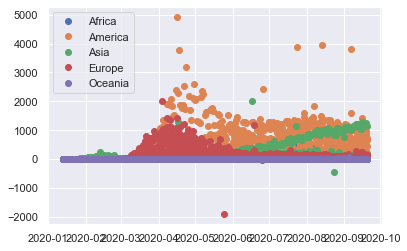

In [24]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [25]:
df_america = df_train[df_train['continent'] == 'America']
df_asia = df_train[df_train['continent'] == 'Asia']
df_europe = df_train[df_train['continent'] == 'Europe']
df_africa = df_train[df_train['continent'] == 'Africa']
df_oceania = df_train[df_train['continent'] == 'Oceania']

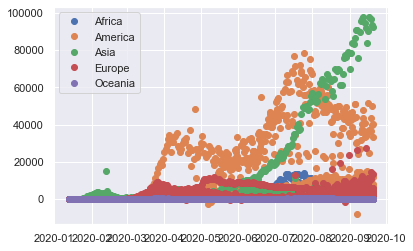

In [26]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['cases'], marker='o', linestyle='', label=name)
plt.legend()

In [27]:
df_train['deathrate'] = df_train['deaths']/ df_train['cases']

In [28]:
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000,deathrate
0,2020-09-20,125,4,Afghanistan,AF,38041757.0,Asia,1.892657,0.032000
1,2020-09-19,47,1,Afghanistan,AF,38041757.0,Asia,1.616645,0.021277
2,2020-09-18,0,0,Afghanistan,AF,38041757.0,Asia,1.535155,NaN
3,2020-09-17,17,0,Afghanistan,AF,38041757.0,Asia,1.653446,0.000000
4,2020-09-16,40,10,Afghanistan,AF,38041757.0,Asia,1.708649,0.250000


In [29]:
df_train['deathrate'] = df_train['deathrate'].fillna(0)

In [30]:
df_train.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000,deathrate
0,2020-09-20,125,4,Afghanistan,AF,38041757.0,Asia,1.892657,0.032000
1,2020-09-19,47,1,Afghanistan,AF,38041757.0,Asia,1.616645,0.021277
2,2020-09-18,0,0,Afghanistan,AF,38041757.0,Asia,1.535155,0.000000
3,2020-09-17,17,0,Afghanistan,AF,38041757.0,Asia,1.653446,0.000000
4,2020-09-16,40,10,Afghanistan,AF,38041757.0,Asia,1.708649,0.250000


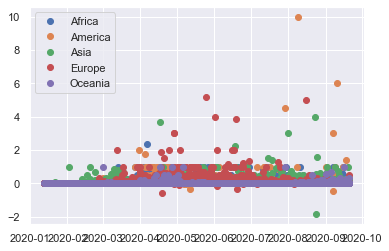

In [31]:
groups = df_train.groupby('continent')
for name, group in groups:
    plt.plot(group['date'], group['deathrate'], marker='o', linestyle='', label=name)
plt.legend()

In [32]:
df_america.head()

,date,cases,deaths,country/territory,geoID,popData2019,continent,cases in last 14 days per 100000
1085,2020-09-20,0,0,Anguilla,AI,14872.0,America,0.0
1086,2020-09-19,0,0,Anguilla,AI,14872.0,America,0.0
1087,2020-09-18,0,0,Anguilla,AI,14872.0,America,0.0
1088,2020-09-17,0,0,Anguilla,AI,14872.0,America,0.0
1089,2020-09-16,0,0,Anguilla,AI,14872.0,America,0.0


In [33]:
df_america['deathrate'] = df_america['deaths']/ df_america['cases']

C:\Users\afm6343\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


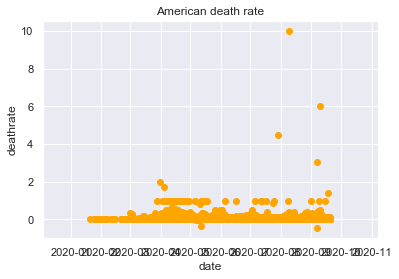

In [36]:
fig, axis = plt.subplots()
axis.set_xlabel('date')
axis.set_ylabel('deathrate')
plt.title('American death rate')
scatter_plot = axis.scatter(df_america['date'], 
    df_america['deathrate'],
    facecolors = 'orange',
    edgecolors = 'orange')